In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: >

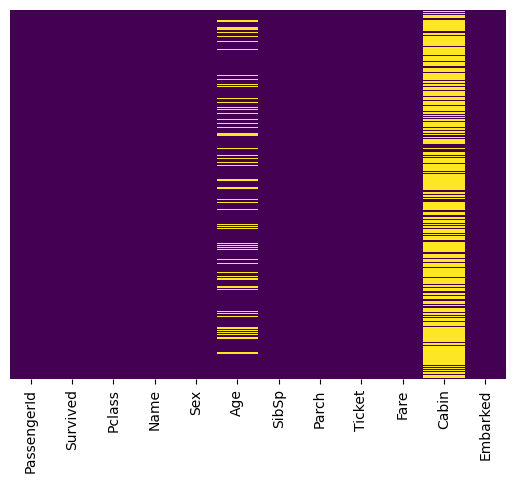

In [5]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
sns.set_style('whitegrid')

<Axes: xlabel='Survived', ylabel='count'>

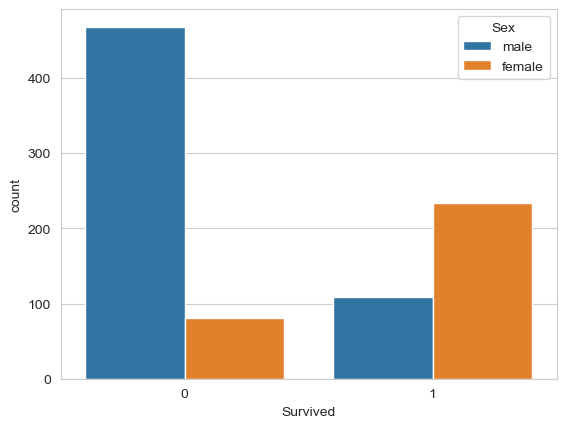

In [9]:
sns.countplot(x='Survived',hue='Sex',data = train)

C:\Users\kusha\AppData\Local\Temp\ipykernel_1608\2747699129.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=False,bins=30)


<Axes: xlabel='Age'>

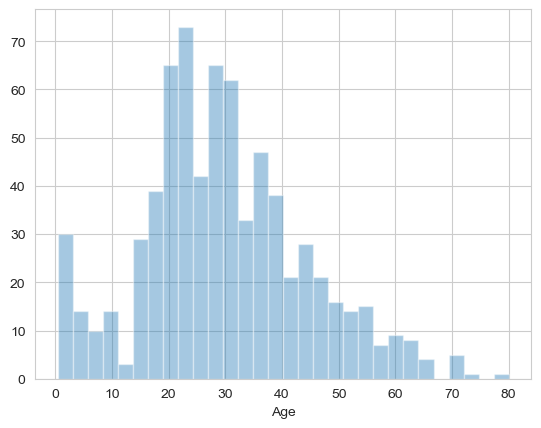

In [10]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

<Axes: xlabel='SibSp', ylabel='count'>

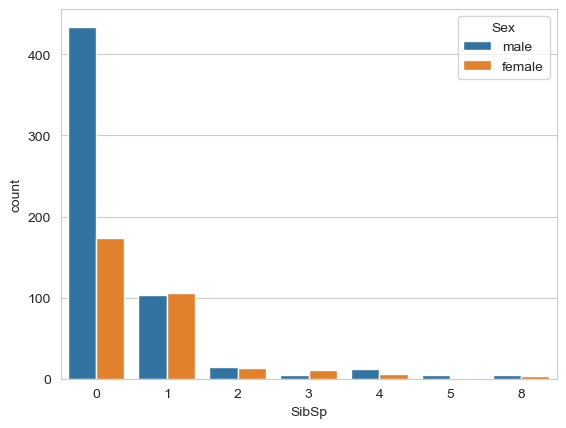

In [14]:
sns.countplot(x='SibSp',hue = 'Sex', data = train)

<Axes: >

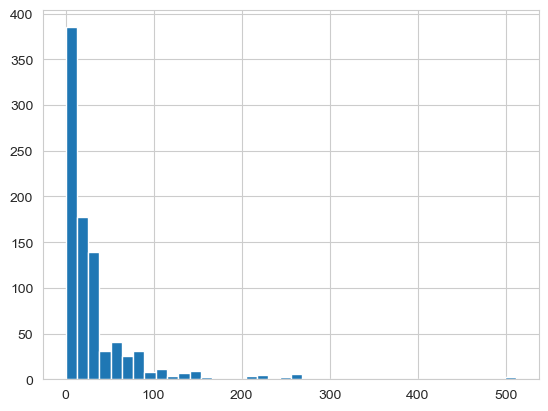

In [18]:
train['Fare'].hist(bins=40)

In [21]:
import cufflinks as cf

In [22]:
cf.go_offline()

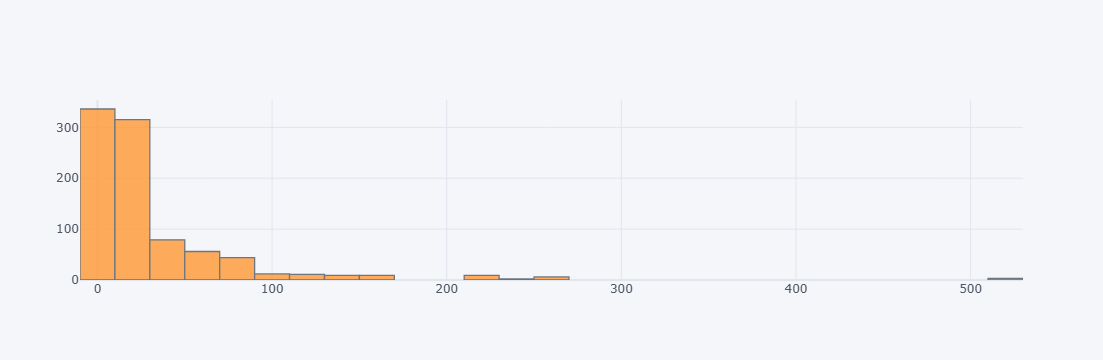

In [24]:
train['Fare'].iplot(kind='hist',bins = 35)

<Axes: xlabel='Pclass', ylabel='Age'>

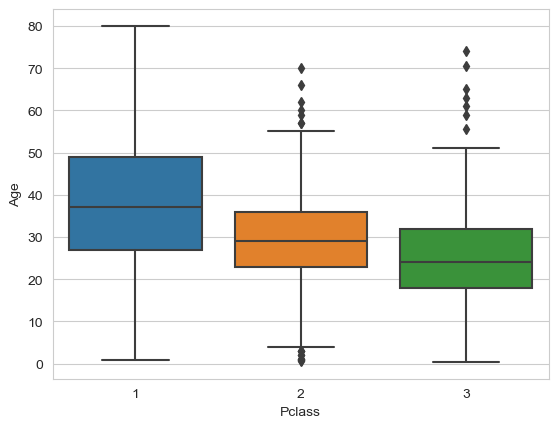

In [25]:
sns.boxplot(x='Pclass',y='Age',data=train)

In [30]:
#to replace null values in Age by avg value
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [31]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

C:\Users\kusha\AppData\Local\Temp\ipykernel_1608\2923723622.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\kusha\AppData\Local\Temp\ipykernel_1608\2923723622.py:4: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

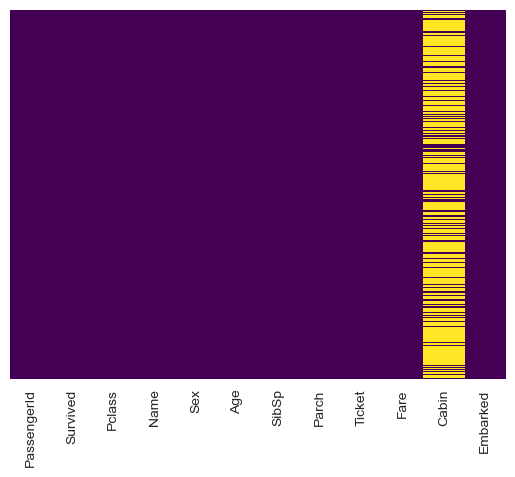

In [32]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [35]:
train.drop('Cabin', axis=1,inplace=True)

In [37]:
train.dropna(inplace = True)

In [47]:
sex = pd.get_dummies(train['Sex'],drop_first=True, dtype = float)

In [48]:
sex.head()

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [50]:
embark = pd.get_dummies(train['Embarked'], drop_first = True, dtype = float)

In [51]:
embark.head()

,Q,S
0,0.0,1.0
1,0.0,0.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0


In [60]:
train = pd.concat([train,sex,embark],axis = 1)

In [61]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,1.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,0.0
2,3,1,3,26.0,0,0,7.9250,0.0,0.0,1.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,1.0


In [62]:
train.drop('PassengerId',axis = 1, inplace=True)

In [64]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:
from sklearn.linear_model import LogisticRegression

In [68]:
logmodel = LogisticRegression()

In [70]:
logmodel.fit(X_train,y_train)

C:\Users\kusha\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [71]:
predictions = logmodel.predict(X_test)

In [72]:
from sklearn.metrics import classification_report

In [74]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
confusion_matrix(y_test,predictions)

array([[147,  16],
       [ 30,  74]], dtype=int64)